<a href="https://colab.research.google.com/github/EnzoGolfetti/bootcamp_ds_aplicada/blob/main/gastos_sus_alura_w2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados do registro civil - Módulo 1 Bootcamp Data Science Aplicada Alura

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#alguns parâmetros importantes do Pandas principalmente para dados em formato Br
#enconding = pode ser que os dados não consigam ser interpretados pelo utf-8, ai temos que encodar provavelmente em latin1
#skiprows exclui linhas que podem ser problemáticas ou que são apenas informações inúteis que não servem para os dados
#skipfooter serve para tirar esses rodapés que também são apenas informações
#thousands é para definir qual o separador dos milhares
#decimal define qual o separador de casas decimais

dados = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/bootcamp_ds_aplicada/main/gastos_registro_civil_proced_alura.csv', sep=';', skiprows=3, encoding='latin1', skipfooter=12,
                    thousands = ".", decimal = ",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [3]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [5]:
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,1.512685e+07,2.271016e+07,2.459419e+07,2.543196e+07,2.651125e+07,2.785858e+07,2.833297e+07,2.780032e+07,2.788751e+07,2.714885e+07,2.474878e+07,2.873955e+07,2.777958e+07,2.802152e+07,3.118086e+07,3.055947e+07,3.206774e+07,3.158067e+07,3.261120e+07,3.306823e+07,3.241981e+07,3.218939e+07,3.116798e+07,3.156009e+07,2.992881e+07,3.299925e+07,3.341603e+07,3.386193e+07,3.299857e+07,3.377663e+07,3.450811e+07,3.357103e+07,3.320255e+07,3.426058e+07,3.372213e+07,3.306842e+07,3.274396e+07,3.454084e+07,3.483417e+07,3.514808e+07,...,4.659257e+07,4.485862e+07,4.644534e+07,4.694370e+07,4.581992e+07,4.631066e+07,4.537205e+07,4.451216e+07,4.513069e+07,4.298447e+07,4.628040e+07,4.687294e+07,4.740435e+07,4.714298e+07,4.820453e+07,4.876378e+07,4.713071e+07,4.799957e+07,4.645374e+07,4.512771e+07,4.771386e+07,4.543018e+07,4.719978e+07,4.816447e+07,5.027433e+07,4.845567e+07,5.085898e+07,5.108601e+07,4.950977e+07,5.115926e+07,4.865212e+07,4.723330e+07,4.914862e+07,4.761848e+07,4.759367e+07,4.101366e+07,4.419363e+07,4.732999e+07,5.449551e+07,5.993732e+09
std,1.915919e+07,3.087944e+07,3.251673e+07,3.333907e+07,3.754077e+07,3.867689e+07,3.929297e+07,3.774891e+07,3.822654e+07,3.667139e+07,3.430265e+07,3.926323e+07,3.798802e+07,3.847297e+07,4.310788e+07,4.137587e+07,4.382047e+07,4.373064e+07,4.493195e+07,4.676027e+07,4.472374e+07,4.465751e+07,4.249073e+07,4.345134e+07,4.112873e+07,4.590237e+07,4.661917e+07,4.658377e+07,4.580069e+07,4.662104e+07,4.756922e+07,4.704992e+07,4.517352e+07,4.835110e+07,4.796588e+07,4.603549e+07,4.662189e+07,4.871679e+07,4.792798e+07,4.943092e+07,...,6.202556e+07,5.770511e+07,6.234915e+07,6.250715e+07,5.928142e+07,6.017879e+07,5.942427e+07,5.889815e+07,5.906176e+07,5.650940e+07,6.049750e+07,6.114294e+07,6.192571e+07,6.115437e+07,6.221664e+07,6.337072e+07,6.072640e+07,6.248640e+07,6.045441e+07,5.991645e+07,6.282883e+07,5.936300e+07,6.111061e+07,6.293618e+07,6.457698e+07,6.235590e+07,6.532398e+07,6.636032e+07,6.343915e+07,6.631342e+07,6.226009e+07,6.060018e+07,6.423455e+07,6.131808e+07,6.217103e+07,5.290071e+07,5.685693e+07,6.225531e+07,7.397429e+07,8.057807e+09
min,6.578895e+05,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+

In [6]:
pd.options.display.float_format = "{:.2f}".format

In [7]:
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

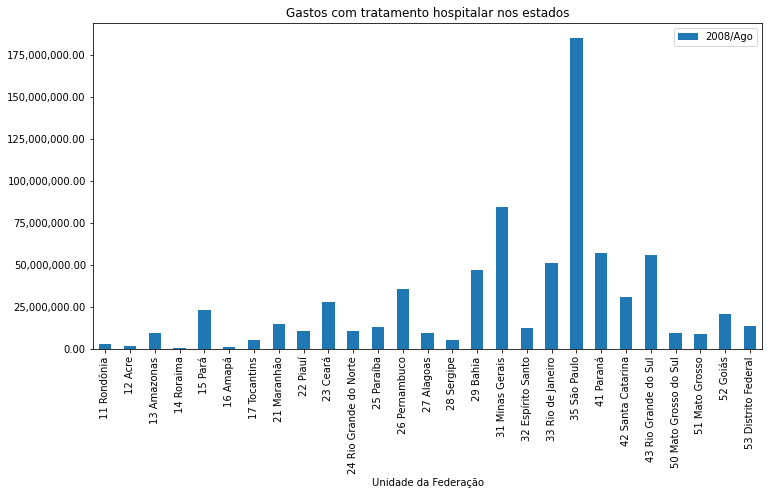

In [8]:
#plotando um gráfico de barras mais simples pelo .plot()
import matplotlib.ticker as ticker
ax = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(12,6))
ax.set_title('Gastos com tratamento hospitalar nos estados')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

In [9]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,102298314.76,100260145.30,95917106.56,102331615.05,93971904.79,90775418.13,94908336.74,91437940.91,102876132.83,83000318.02,82381774.95,86051002.13,100531035.83,101374341.51,11958647088.33
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,19870933.20,18913862.69,19591383.84,18935437.09,17230688.81,17895244.76,18115134.64,19542439.88,19032785.73,17410262.53,17913161.92,17331445.92,18755557.92,19241624.02,2172157981.36
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,16314811.22,16763581.32,15608982.84,15855641.23,15811477.04,15029205.51,15249241.20,15046851.63,14886817.29,12546999.04,13604225.34,13151005.63,16371639.49,17790649.87,2036923784.59
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417.42,2498

In [10]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

In [11]:
data = dados.drop(labels=[1], axis=0)

In [12]:
data.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888.58,2587642.41,1923440.17,2422446.17,2495491.03,2851291.67,3137537.40,3788154.80,3217218.61,3113940.14,3157977.67,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,305010883.18
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,21526303.70,23896804.99,24613320.93,24015940.01,26624310.10,26478979.58,26366401.19,25440701.25,28079331.88,27588522.26,27967969.22,28430631.19,25432419.12,26405862.20,25841889.70,26527192.33,27433129.31,25753868.16,27515463.84,26934203.47,26668195.02,26606749.81,27226660.53,27185706.84,27019994.90,26036033.25,27913374.40,26771060.28,27060396.38,...,32202265.99,32771002.63,32204013.38,34983747.88,34138970.65,33280643.37,34426413.15

In [13]:
data['2020/Ago'] = data['2020/Ago'].astype('float64')

In [14]:
data['2020/Ago'].mean()

56505034.29346153

In [15]:
dados.iloc[1,152] = 56505034.29

In [16]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,56505034.29,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43

In [17]:
dados['2020/Ago'] = dados['2020/Ago'].astype('float64') 

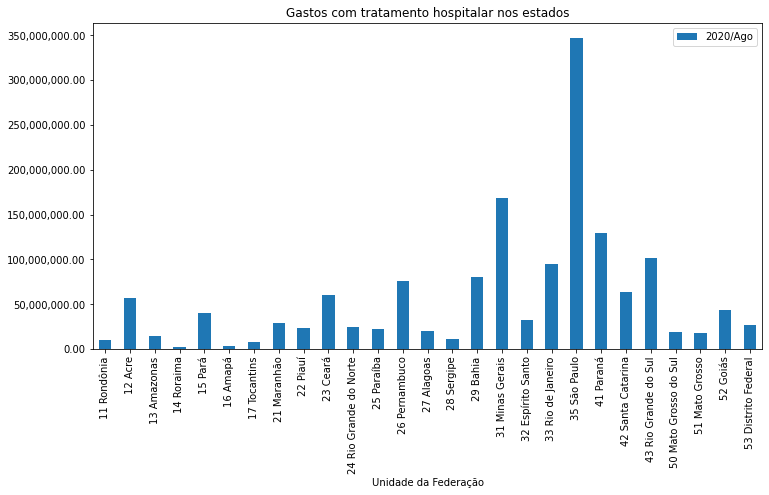

In [18]:
ax = dados.plot(x='Unidade da Federação', y='2020/Ago', kind='bar', figsize=(12,6))
ax.set_title('Gastos com tratamento hospitalar nos estados')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

##Dados da base A160 - gastos com saúde

In [19]:
#alguns parâmetros importantes do Pandas principalmente para dados em formato Br
#enconding = pode ser que os dados não consigam ser interpretados pelo utf-8, ai temos que encodar provavelmente em latin1
#skiprows exclui linhas que podem ser problemáticas ou que são apenas informações inúteis que não servem para os dados
#skipfooter serve para tirar esses rodapés que também são apenas informações
#thousands é para definir qual o separador dos milhares
#decimal define qual o separador de casas decimais

dados = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/bootcamp_ds_aplicada/main/gastos_estados_92_2020_alura.csv', sep=';', skiprows=3, encoding='latin1', skipfooter=12,
                    thousands = ".", decimal = ",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [20]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 280 entries, Unidade da Federação to Total
dtypes: float64(157), object(123)
memory usage: 59.2+ KB


In [22]:
dados.describe()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,304952.77,788145.26,2440162.96,5517354.05,12337159.42,75697225.19,23816397.50,25876082.14,26210419.17,26215326.43,26215813.95,27487256.94,26636409.89,27049886.85,28081122.60,27341312.17,26787449.88,30527229.24,26456070.48,32379863.58,30958546.09,31694131.59,31484964.21,32308861.22,32395914.83,31740421.75,31961618.10,31073667.92,29404929.86,33267948.42,28995076.19,35040423.86,33722818.68,34766887.35,32487812.06,33191859.52,35296135.51,33316513.80,33665268.33,32980701.06,...,47573437.81,44982552.14,46225259.58,48124741.88,44016901.84,46408157.62,43927647.26,42373621.49,45739245.03,41032262.53,46827789.99,47239172.40,48417052.85,46395470.88,48086014.64,49345477.29,45758563.30,49566746.37,46123498.40,43886096.76,47687458.50,44611528.07,47288709.35,48423567.04,51139897.77,47411368.59,51552077.60,50394646.23,49325792.18,51035126.81,47560486.81,45776962.72,49365504.99,45084524.48,45236027.39,40005678.92,46769027.82,45367349.74,40717083.95,5993724452.01
std,392806.00,1071747.56,3421972.10,7767711.29,16345863.65,198450569.38,34438026.15,34803780.06,34778272.53,35053393.15,35598113.03,37029076.40,36524519.40,36726417.77,39123815.90,38529429.56,36609830.82,40579230.19,36283350.66,44086212.13,43082204.22,43241295.39,43219730.36,43867224.57,43769200.68,43476298.89,43762451.59,42384483.79,39389922.27,44271908.23,39768566.58,48345431.10,45539527.73,46988344.41,45304048.45,45674111.41,49928691.06,45563962.79,47802415.73,45791966.84,...,62030945.73,58175274.05,60208008.37,63497043.49,56710314.78,60690288.24,56839876.94,55014426.00,59269217.98,53547379.58,60615321.14,60947262.29,62003517.93,59746338.72,61581707.51,63422341.58,58980269.22,64040556.09,59464319.37,56760458.05,61842215.77,57091413.99,60729021.43,62405602.25,65749545.42,60552099.50,65999947.68,64357372.21,62634426.60,65054555.98,60419931.36,58350827.23,63825806.17,57378788.07,58487564.07,52470681.18,61740606.78,60665540.70,56808984.40,8057775772.23
min,4113.76,11858.63,43852.67,226661.18,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1341532.34,1517391.92,1597811.24,1536941.82,1617781.76,1448489.25,1817004.16,1715762.10,1739371.09,1826492.45,1827433.46,1933782.60,1721224.14,1679410.24,1528245.34,...,2125677.11,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2277493.49,2441325.03,2234388.36,2473008.49,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2383895.48,2199920.70,11638

In [23]:
pd.options.display.float_format = "{:.2f}".format

In [24]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [25]:
col_uso = dados.mean().index.tolist()

In [26]:
col_uso

['2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',

In [27]:
col_uso.insert(0, "Unidade da Federação")

In [28]:
col_uso

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [29]:
col_uso = dados.loc[:,col_uso]

In [30]:
col_uso = col_uso.set_index("Unidade da Federação")

In [31]:
col_uso.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

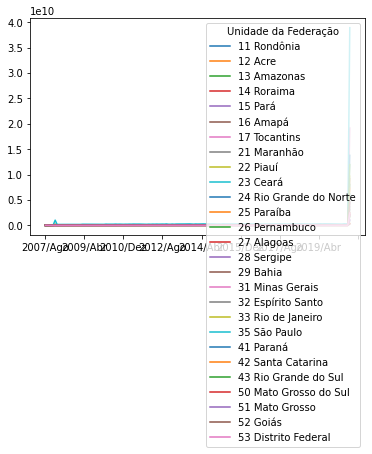

In [32]:
col_uso.T.plot()

Podemos ver que ter uma linha de Totais está distorcendo o gráfico, vamos remover a linha pra poder visualizar melhor.

In [33]:
col_uso = col_uso.drop(columns=['Total'])

Relembrando: o T serve para transpor o dataset, ou seja, inverter as linhas e colunas.

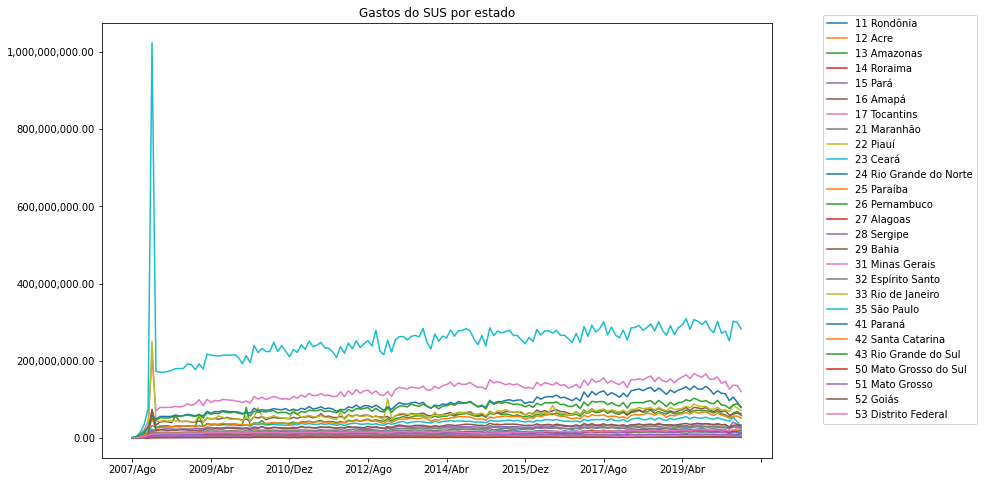

In [34]:
ax = col_uso.T.plot(figsize=(12,8))
ax.set_title('Gastos do SUS por estado')
plt.legend(bbox_to_anchor=(1.07,1.03), loc='upper left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()

Escolhendo 5 estados para plotar o mesmo gráfico

In [35]:
col_uso.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [36]:
states5 = col_uso.loc[['13 Amazonas', '29 Bahia','53 Distrito Federal', '35 São Paulo', '43 Rio Grande do Sul'],:]

In [37]:
states5

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
29 Bahia,135146.36,448349.75,1382038.11,3348779.62,11948984.56,73336297.08,33410124.06,41301703.40,42826993.62,42071294.17,39910042.40,57664560.93,43254543.33,42851268.02,43332573.68,40946908.97,41424654.95,43856594.59,41094717.03,51476930.68,49585513.41,50686984.15,48851108.39,51075073.25,53386058.82,50894817.50,50114090.45,48792856.88,47427830.70,48612761.25,44513251.78,54612375.13,51537423.45,55436692.73,47478799.39,51149585.31,53626809.52,51013229.85,51499348.41,51206307.37,...,65647665.21,75549644.06,67489755.47,71945113.75,74149269.96,68138500.52,71754532.81,68339840.68,64799523.04,70337401.26,60856693.72,68977621.88,70891958.96,73083665.68,68369626.55,74877735.12,74697458.17,70616508.53,76593857.76,71537495.45,67570990.10,70100594.56,66814605.62,69938897.52,73283101.63,79407131.76,70572836.97,79567215.83,77852441.31,75439699.10,78987864.57,72314938.33,68576836.10,74373631.19,67697544.36,70340301.29,59109689.20,61756775.71,65159300.63,58898100.40
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,11969271.76,11299443.00,11548451.89,12422577.60,12419976.84,12302698.99,12005669.60,13150489.00,12358825.51,14445518.57,14434211.04,14622167.93,14209413.80,14459081.79,15051993.46,14045711.83,13162775.24,13197596.70,12889509.22,13484046.67,13295738.66,14928384.44,13535496.11,14394599.86,13863063.00,14051586.56,15073336.93,14636724.40,14052063.36,14277016.84,...,16523664.46,15531998.60,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212

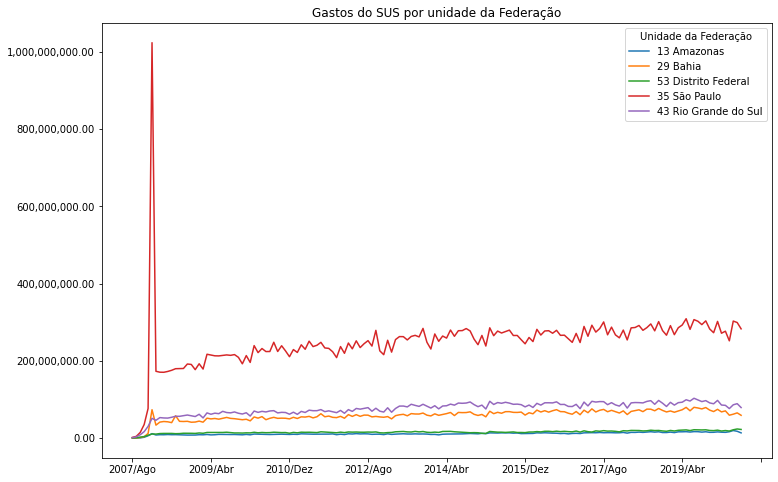

In [38]:
ax = states5.T.plot(figsize=(12,8))
ax.set_title('Gastos do SUS por unidade da Federação')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.show()

##Tratando o dado de 1 bilhão que está errado no Estado de SP

In [39]:
col_uso.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

In [40]:
col_uso = col_uso.iloc[:,6:]

Cortamos as datas anteriores devido aos erros nos dados. Provavelmente estavam assim porque como a série começou em 2008, muitos dados de atendimentos foram jogados para a data de processamento (2008).

##Dispondo por ordem de gastos

In [41]:
#readicionando a coluna total
col_uso['Total'] = col_uso.sum(axis=1)

In [42]:
col_uso.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 151 entries, 2008/Fev to Total
dtypes: float64(151)
memory usage: 33.3+ KB


In [43]:
dados_ordem = col_uso.sort_values('Total', ascending=False)

In [44]:
dados_ordem.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,37623121382.14
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,18817177001.90
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,13640639986.82
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.7

In [45]:
dados_ordem = dados_ordem.drop(columns=['Total'])

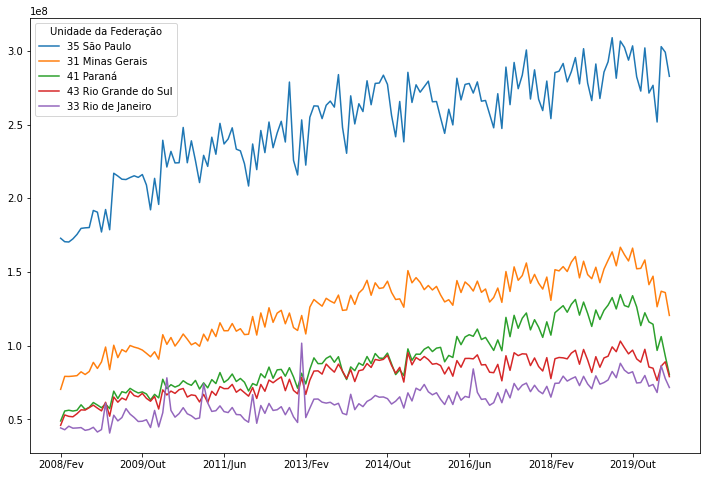

In [46]:
ax = dados_ordem.head(5).T.plot(figsize=(12,8))

plt.show()

##Adicionando um Estado junto aos 5 maiores

In [47]:
dados_ordem.index

Index(['35 São Paulo', '31 Minas Gerais', '41 Paraná', '43 Rio Grande do Sul',
       '33 Rio de Janeiro', '29 Bahia', '26 Pernambuco', '42 Santa Catarina',
       '23 Ceará', '52 Goiás', '15 Pará', '21 Maranhão', '32 Espírito Santo',
       '24 Rio Grande do Norte', '25 Paraíba', '53 Distrito Federal',
       '50 Mato Grosso do Sul', '22 Piauí', '27 Alagoas', '51 Mato Grosso',
       '13 Amazonas', '28 Sergipe', '17 Tocantins', '11 Rondônia', '12 Acre',
       '14 Roraima', '16 Amapá'],
      dtype='object', name='Unidade da Federação')

In [48]:
para = dados_ordem.T['15 Pará']

In [49]:
para

2008/Fev   20126081.01
2008/Mar   22149375.82
2008/Abr   23436682.75
2008/Mai   23861080.80
2008/Jun   23502915.90
               ...    
2020/Mar   34749098.46
2020/Abr   28714969.96
2020/Mai   41248502.78
2020/Jun   35396030.78
2020/Jul   27618727.51
Name: 15 Pará, Length: 150, dtype: float64

In [50]:
dados_ordem_major5 = dados_ordem.head(5) 

In [51]:
dados_ordem_major5 = dados_ordem_major5.T

In [52]:
dados_ordem_major5['15 Pará'] = para

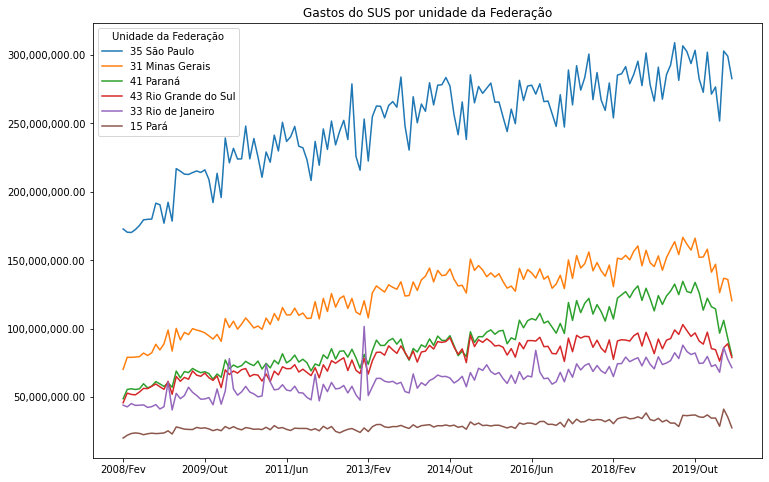

In [53]:
ax = dados_ordem_major5.plot(figsize=(12,8))
ax.set_title('Gastos do SUS por unidade da Federação')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.show()

##Adicionando coluna com as respectivas regiões

Aplicando forma ineficiente e que só funciona devido ao baixo número de dados.

In [54]:
col_uso.index

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [55]:
regioes = ['Norte','Norte','Norte','Norte','Norte','Norte','Norte',
           'Nordeste','Nordeste','Nordeste','Nordeste','Nordeste','Nordeste','Nordeste','Nordeste','Nordeste',
           'Sudeste','Sudeste','Sudeste','Sudeste',
           'Sul','Sul','Sul',
           'Centro-Oeste','Centro-Oeste','Centro-Oeste','Centro-Oeste']

In [56]:
col_uso['regioes'] = regioes

In [57]:
col_uso.head(10)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total,regioes
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,922530191.37,Norte
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,417753402.52,Norte
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1747039217.57,Norte
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,...,2699213.

Forma mais eficiente de inserir as regiões.

In [58]:
col_uso = col_uso.drop(columns='regioes')

In [59]:
col_uso['regiao'] = str

In [60]:
col_uso.index[col_uso.index.str.startswith('1')]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins'],
      dtype='object', name='Unidade da Federação')

In [61]:
col_uso.loc[col_uso['regiao'].index[col_uso.index.str.startswith("1")], 'regiao'] = 'Norte'

In [62]:
col_uso.head(15)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total,regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,922530191.37,Norte
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,417753402.52,Norte
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1747039217.57,Norte
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,...,2699213.8

In [63]:
col_uso.loc[col_uso['regiao'].index[col_uso.index.str.startswith("2")], 'regiao'] = 'Nordeste'

In [64]:
col_uso.loc[col_uso['regiao'].index[col_uso.index.str.startswith("3")], 'regiao'] = 'Sudeste'

In [65]:
col_uso.loc[col_uso['regiao'].index[col_uso.index.str.startswith("4")], 'regiao'] = 'Sul'

In [66]:
col_uso.loc[col_uso['regiao'].index[col_uso.index.str.startswith("5")], 'regiao'] = 'Centro-Oeste'

In [67]:
col_uso['regiao']

Unidade da Federação
11 Rondônia                      Norte
12 Acre                          Norte
13 Amazonas                      Norte
14 Roraima                       Norte
15 Pará                          Norte
16 Amapá                         Norte
17 Tocantins                     Norte
21 Maranhão                   Nordeste
22 Piauí                      Nordeste
23 Ceará                      Nordeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
26 Pernambuco                 Nordeste
27 Alagoas                    Nordeste
28 Sergipe                    Nordeste
29 Bahia                      Nordeste
31 Minas Gerais                Sudeste
32 Espírito Santo              Sudeste
33 Rio de Janeiro              Sudeste
35 São Paulo                   Sudeste
41 Paraná                          Sul
42 Santa Catarina                  Sul
43 Rio Grande do Sul               Sul
50 Mato Grosso do Sul     Centro-Oeste
51 Mato Grosso            Centro-Oeste
52 G

##Gráficos dos estados do Sudeste e comparações sobre 13 de Fevereiro

In [68]:
sudeste = col_uso[col_uso['regiao'] == 'Sudeste']

In [69]:
sudeste = sudeste.drop(columns=['Total', 'regiao'])

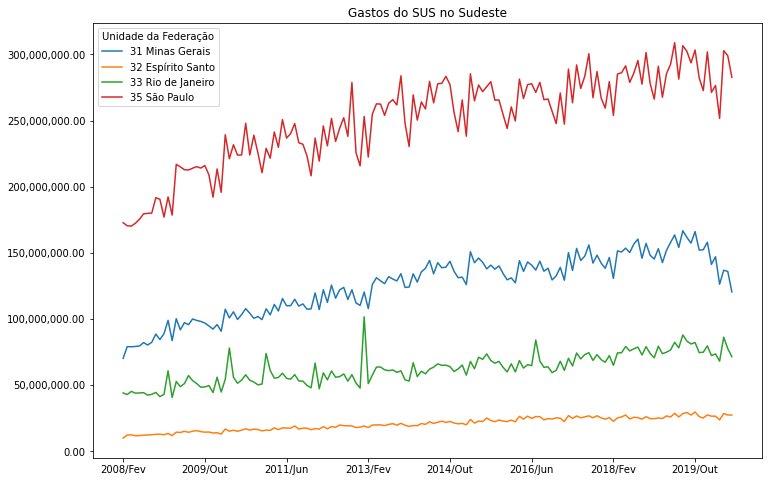

In [70]:
ax = sudeste.T.plot(figsize=(12,8))
ax.set_title('Gastos do SUS no Sudeste')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.show()

Podemos ver a partir do gráfico acima que o pico de Fev de 2013 não se repete nos outros estados.

##Conclusões sobre o gráfico com um estado escolhido deliberadamente

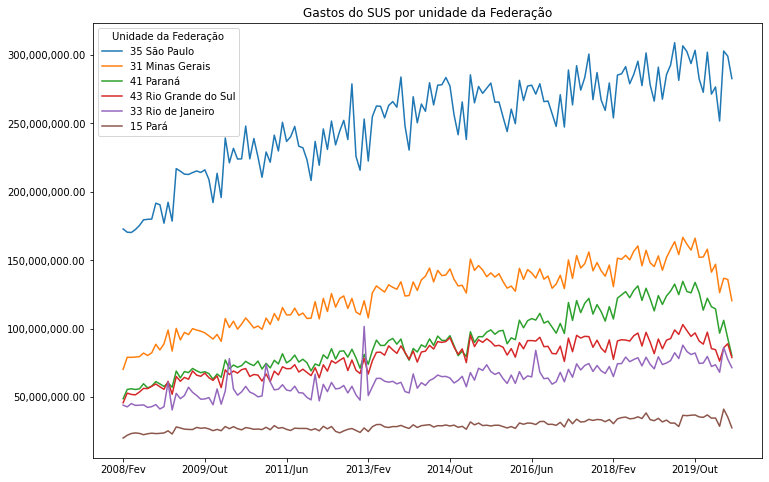

In [71]:
ax = dados_ordem_major5.plot(figsize=(12,8))
ax.set_title('Gastos do SUS por unidade da Federação')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.show()

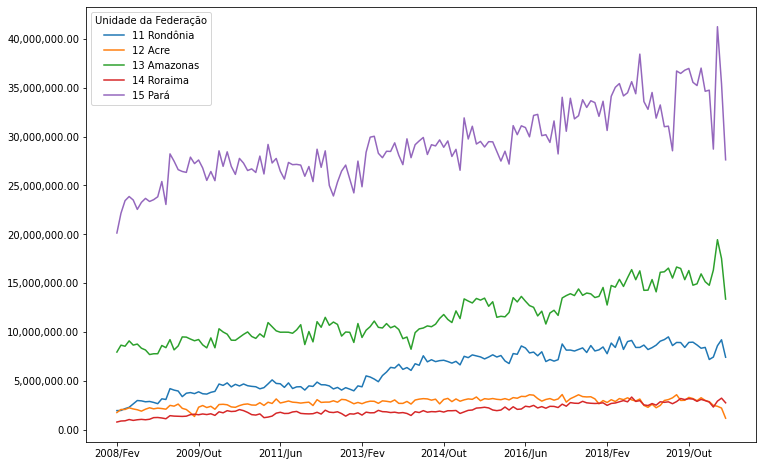

In [72]:
col_uso2 = col_uso.drop(columns=['regiao', 'Total'])

ax = col_uso2.head(5).T.plot(figsize=(12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.show()

Há duas questões que gostaria de tirar desse gráfico, mesmo com o Pará sendo o maior estado da região Norte e com gastos acima de seus pares ele ainda fica muito abaixo dos 5 maiores gastos do país.

Segundo, podemos ver que a região Sudeste tem o monopólio dos gastos no país com exceção do Espírito Santo (muito provavelmente devido à sua população).

##Desafios aula 5

Gráfico dos gastos em função do Estado de SP e adicionando grid ao gráfico

In [73]:
col_uso2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 150 entries, 2008/Fev to 2020/Jul
dtypes: float64(150)
memory usage: 33.1+ KB


In [74]:
gastos_funcao_sp =  col_uso['Total']/col_uso.loc['35 São Paulo', 'Total']

In [75]:
gastos_funcao_sp.head()

Unidade da Federação
11 Rondônia   0.02
12 Acre       0.01
13 Amazonas   0.05
14 Roraima    0.01
15 Pará       0.12
Name: Total, dtype: float64

In [76]:
 gastos_funcao_sp = gastos_funcao_sp.sort_values(ascending=False)

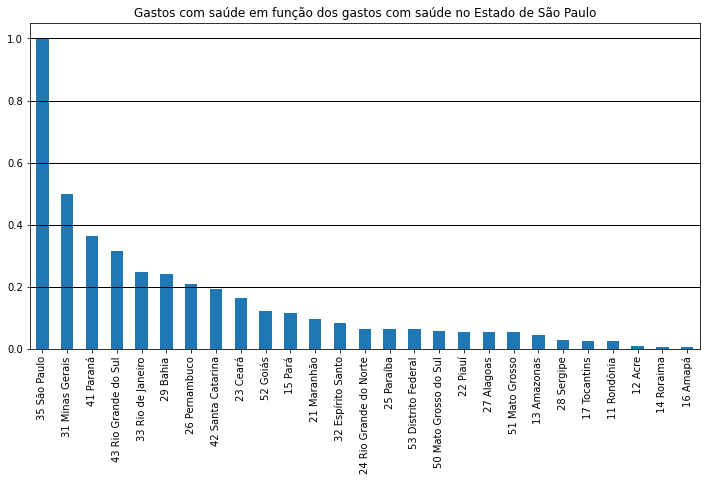

In [77]:
ax = gastos_funcao_sp.plot(figsize=(12,6), kind='bar')
ax.set_title('Gastos com saúde em função dos gastos com saúde no Estado de São Paulo')
ax.set_xlabel(None)

plt.grid(axis='y', color='black', linewidth=1)
plt.show()

In [78]:
pop_sp = 44840384
pop_minas = 21292666

In [79]:
gastos_total_sp = col_uso.loc['35 São Paulo', 'Total'] / pop_sp

In [80]:
gastos_total_sp

839.0454769999293

In [81]:
gastos_total_minas = col_uso.loc['31 Minas Gerais','Total'] / pop_minas

In [82]:
gastos_total_minas

883.7398286292567

In [83]:
gastos_sp_ano = col_uso2.loc['35 São Paulo'] / pop_sp

In [84]:
gastos_mg_ano = col_uso2.loc['31 Minas Gerais'] / pop_minas

In [85]:
gastos_por_pop = pd.DataFrame(data=[gastos_mg_ano, gastos_sp_ano])
gastos_por_pop.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
31 Minas Gerais,3.30,3.72,3.71,3.72,3.74,3.86,3.77,3.87,4.16,3.97,4.18,4.65,3.93,4.71,4.31,4.57,4.50,4.70,4.65,4.61,4.55,4.45,4.34,4.50,4.26,5.04,4.74,4.95,4.68,4.85,5.06,4.90,4.72,4.79,4.67,5.06,4.84,5.22,4.98,5.42,...,6.42,7.20,6.78,6.93,7.33,6.68,6.97,6.68,6.50,6.88,6.14,7.11,7.08,7.21,7.06,7.36,7.53,6.85,7.39,6.96,6.83,7.19,6.70,7.14,7.42,7.68,7.24,7.83,7.59,7.39,7.80,7.14,7.16,7.42,6.64,6.91,5.93,6.43,6.39,5.66
35 São Paulo,3.85,3.80,3.80,3.84,3.91,4.00,4.01,4.02,4.27,4.25,3.95,4.29,3.98,4.84,4.80,4.75,4.74,4.77,4.80,4.78,4.82,4.66,4.28,4.76,4.37,5.34,4.93,5.17,4.99,5.00,5.53,5.00,5.33,5.03,4.70,5.11,4.94,5.38,5.13,5.59,...,5.88,6.51,6.12,6.32,6.70,5.96,6.40,5.96,5.79,6.23,5.66,6.36,6.38,6.50,6.22,6.37,6.59,6.19,6.72,6.20,5.94,6.49,5.97,6.37,6.53,6.89,6.28,6.84,6.74,6.55,6.77,6.30,6.08,6.73,6.05,6.17,5.61,6.75,6.67,6.30


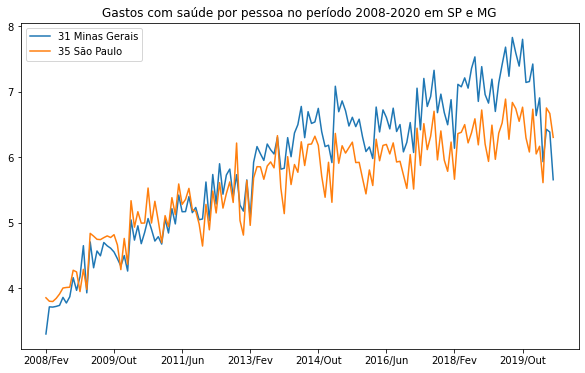

In [86]:
ax = gastos_por_pop.T.plot(figsize=(10,6))
ax.set_title('Gastos com saúde por pessoa no período 2008-2020 em SP e MG')
plt.show()

Interessante ver que em gastos absolutos São Paulo gastou mais do que Minas Gerais, porém em valores relativos praticamente em todos os anos MG gastou mais por paciente.

#Módulo 2 - Bootcamp Alura

Começamos o módulo lendo arquivos de novas fontes, primeiro pegamos dados em XLS sobre as estimativas da população no site do IBGE e em seguida trabalhamos com a coleta de dados em HTML da página do Wikipedia sobre a população por estado que está de acordo com a projeção do IBGE que coletamos.

Um comando interessante que pude aprender com esse exercício foi o parâmetro "sheet_name" que permite ler os dados de uma sheet específica do Excel. Muito útil para quando há planilhas com vínculos.

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [ ]:
pop_ibge = pd.read_excel('/content/estimativa_dou_2020.xls', skiprows=1, skipfooter=16, sheet_name='BRASIL E UFs')
pop_ibge.head()

In [ ]:
pop_ibge = pd.read_excel('/content/estimativa_dou_2020.xls', skiprows=1, skipfooter=16, sheet_name='Municípios')
pop_ibge.tail()

Aplicação da Beautiful Soup para coletar a mesma tabela, como vou citar abaixo, o pd.read_html usa +/- a mesma lógica.

In [89]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

In [90]:
html = requests.get('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
html = html.text
soup = BeautifulSoup(html, 'html.parser')

In [91]:
table = soup.find('table', attrs={'class':'wikitable sortable'})
table = pd.read_html(table.prettify())
table = table[0]
table

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


Com o HTML, o pandas retorna uma lista, se for um site bem estruturado (caso da Wikipedia)  ele conseguirá identificar tabelas e dados estruturados e vai retornar apenas elas na lista, a partir daí fazemos o slice na tabela que queremos e podemos guardar numa variável.

Nota: na documentação do read_html está falando que usa bs4 para essa interpretação, o que pessoalmente achei muito bacana visto que tenho utilizado bastante essa biblioteca ultimamente para fazer Web Scraping.

In [92]:
pop_dados = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
type(pop_dados)

list

In [93]:
len(pop_dados)

5

In [94]:
pop_dados = pop_dados[0]

In [95]:
pop_dados.head()

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)


In [96]:
pop_dados.rename(columns={'Posição':'posicao', 'Unidade federativa':'uf', 'População':'populacao', '% da pop. total':'%total', 
                          'País comparável (habitantes)':'pais_comparacao'}, inplace=True)

In [97]:
pop_dados.set_index('uf', inplace=True)

In [98]:
pop_dados.head()

,posicao,populacao,%total,pais_comparacao
uf,,,,
São Paulo,1,46 289 333,"21,9%",Espanha (46 439 864)
Minas Gerais,2,21 292 666,"10,1%",Sri Lanka (20 675 000)
Rio de Janeiro,3,17 366 189,"8,2%",Países Baixos (16 922 900)
Bahia,4,14 930 634,"7,1%",Chade (14 037 000)
Paraná,5,11 516 840,"5,4%",Bolívia (11 410 651)


In [99]:
pop_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   posicao          27 non-null     int64 
 1   populacao        27 non-null     object
 2   %total           27 non-null     object
 3   pais_comparacao  27 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [100]:
pop_dados.populacao = pop_dados.populacao.str.replace(" ",'')

In [101]:
pop_dados.head()

,posicao,populacao,%total,pais_comparacao
uf,,,,
São Paulo,1,46289333,"21,9%",Espanha (46 439 864)
Minas Gerais,2,21292666,"10,1%",Sri Lanka (20 675 000)
Rio de Janeiro,3,17366189,"8,2%",Países Baixos (16 922 900)
Bahia,4,14930634,"7,1%",Chade (14 037 000)
Paraná,5,11516840,"5,4%",Bolívia (11 410 651)


In [102]:
pop_dados['populacao'] = pop_dados['populacao'].astype('float64')

In [103]:
pop_dados.head()

,posicao,populacao,%total,pais_comparacao
uf,,,,
São Paulo,1,46289333.00,"21,9%",Espanha (46 439 864)
Minas Gerais,2,21292666.00,"10,1%",Sri Lanka (20 675 000)
Rio de Janeiro,3,17366189.00,"8,2%",Países Baixos (16 922 900)
Bahia,4,14930634.00,"7,1%",Chade (14 037 000)
Paraná,5,11516840.00,"5,4%",Bolívia (11 410 651)


In [104]:
pop_dados.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [105]:
populacao = pop_dados['populacao']
populacao

uf
São Paulo             46289333.00
Minas Gerais          21292666.00
Rio de Janeiro        17366189.00
Bahia                 14930634.00
Paraná                11516840.00
Rio Grande do Sul     11422973.00
Pernambuco             9616621.00
Ceará                  9187103.00
Pará                   8690745.00
Santa Catarina         7252502.00
Maranhão               7114598.00
Goiás                  7113540.00
Amazonas               4207714.00
Espírito Santo         4064052.00
Paraíba                4039277.00
Rio Grande do Norte    3534165.00
Mato Grosso            3526220.00
Alagoas                3351543.00
Piauí                  3281480.00
Distrito Federal       3055149.00
Mato Grosso do Sul     2809394.00
Sergipe                2318822.00
Rondônia               1796460.00
Tocantins              1590248.00
Acre                    894470.00
Amapá                   861773.00
Roraima                 631181.00
Name: populacao, dtype: float64

In [106]:
gasto_mais_recente = col_uso2['2020/Jul']
gasto_mais_recente

Unidade da Federação
11 Rondônia                7407388.24
12 Acre                    1163813.08
13 Amazonas               13358514.02
14 Roraima                 2739498.41
15 Pará                   27618727.51
16 Amapá                   2155083.37
17 Tocantins               4489665.87
21 Maranhão               24374205.15
22 Piauí                  18019214.49
23 Ceará                  30809221.22
24 Rio Grande do Norte    19593057.45
25 Paraíba                15491469.06
26 Pernambuco             62325444.34
27 Alagoas                13087850.40
28 Sergipe                 3312766.32
29 Bahia                  58898100.40
31 Minas Gerais          120467187.34
32 Espírito Santo         27460475.47
33 Rio de Janeiro         71540227.33
35 São Paulo             282709570.31
41 Paraná                 80320852.69
42 Santa Catarina         51764534.76
43 Rio Grande do Sul      78929703.81
50 Mato Grosso do Sul     12508717.35
51 Mato Grosso            13083151.70
52 Goiás                  334

In [107]:
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

In [108]:
gasto_mais_recente.index = gasto_mais_recente.index.str[3:]

In [109]:
#tive que colocar em Df de volta porque quando fiz o slice, como já havia transformado uf em index, sobrou uma Series e não um df
populacao = pd.DataFrame(populacao)
populacao

,populacao
uf,
São Paulo,46289333.00
Minas Gerais,21292666.00
Rio de Janeiro,17366189.00
Bahia,14930634.00
Paraná,11516840.00
Rio Grande do Sul,11422973.00
Pernambuco,9616621.00
Ceará,9187103.00
Pará,8690745.00


In [110]:
populacao = populacao.join(gasto_mais_recente)

In [111]:
populacao

,populacao,2020/Jul
uf,,
São Paulo,46289333.00,282709570.31
Minas Gerais,21292666.00,120467187.34
Rio de Janeiro,17366189.00,71540227.33
Bahia,14930634.00,58898100.40
Paraná,11516840.00,80320852.69
Rio Grande do Sul,11422973.00,78929703.81
Pernambuco,9616621.00,62325444.34
Ceará,9187103.00,30809221.22
Pará,8690745.00,27618727.51


In [112]:
populacao['gasto_habitante'] = populacao['2020/Jul'] / populacao['populacao']
populacao

,populacao,2020/Jul,gasto_habitante
uf,,,
São Paulo,46289333.00,282709570.31,6.11
Minas Gerais,21292666.00,120467187.34,5.66
Rio de Janeiro,17366189.00,71540227.33,4.12
Bahia,14930634.00,58898100.40,3.94
Paraná,11516840.00,80320852.69,6.97
Rio Grande do Sul,11422973.00,78929703.81,6.91
Pernambuco,9616621.00,62325444.34,6.48
Ceará,9187103.00,30809221.22,3.35
Pará,8690745.00,27618727.51,3.18


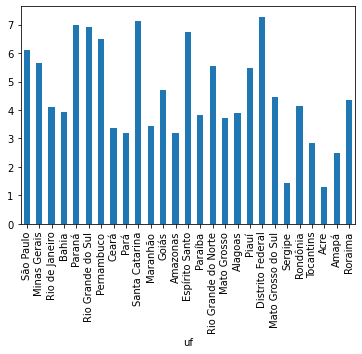

In [113]:
#gasto por habitante, ordenado por população
populacao['gasto_habitante'].plot(kind='bar')

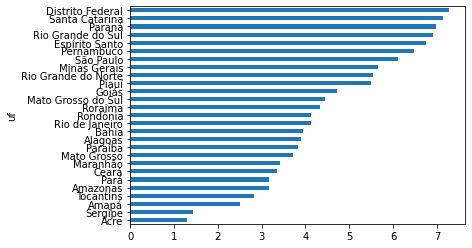

In [114]:
#organizando o gráfico em ordem por gasto por habitante
populacao['gasto_habitante'].sort_values().plot(kind='barh')

In [115]:
import seaborn as sns

In [116]:
populacao

,populacao,2020/Jul,gasto_habitante
uf,,,
São Paulo,46289333.00,282709570.31,6.11
Minas Gerais,21292666.00,120467187.34,5.66
Rio de Janeiro,17366189.00,71540227.33,4.12
Bahia,14930634.00,58898100.40,3.94
Paraná,11516840.00,80320852.69,6.97
Rio Grande do Sul,11422973.00,78929703.81,6.91
Pernambuco,9616621.00,62325444.34,6.48
Ceará,9187103.00,30809221.22,3.35
Pará,8690745.00,27618727.51,3.18


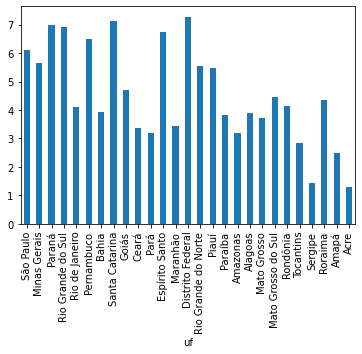

In [117]:
#gasto por habitante ordenado por gasto absoluto
gasto_habitante_gasto_absoluto = populacao.sort_values('2020/Jul', ascending=False)
gasto_habitante_gasto_absoluto['gasto_habitante'].plot(kind='bar')

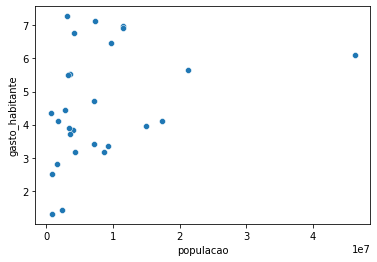

In [118]:
sns.scatterplot(data=populacao, x='populacao', y='gasto_habitante')

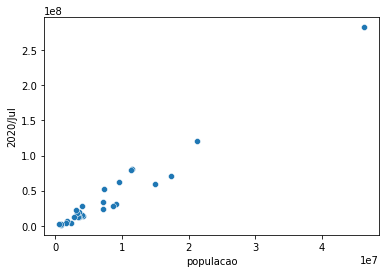

In [119]:
sns.scatterplot(data=populacao, x='populacao', y='2020/Jul')

Fazendo a mesma análise para o mês anterior: 2020/Jun (super desafio aula 02)

In [120]:
gasto_junho_2020 = col_uso2['2020/Jun']

In [121]:
gasto_junho_2020.index = gasto_junho_2020.index.str[3:]

In [122]:
populacao = populacao.join(gasto_junho_2020)

In [123]:
populacao.rename(columns={'populacao':'habitantes', '2020/Jul':'gasto_julho_2020', '2020/Jun':'gasto_junho_2020'}, inplace=True)

In [124]:
populacao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, São Paulo to Roraima
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   habitantes        27 non-null     float64
 1   gasto_julho_2020  27 non-null     float64
 2   gasto_habitante   27 non-null     float64
 3   gasto_junho_2020  27 non-null     float64
dtypes: float64(4)
memory usage: 2.3+ KB


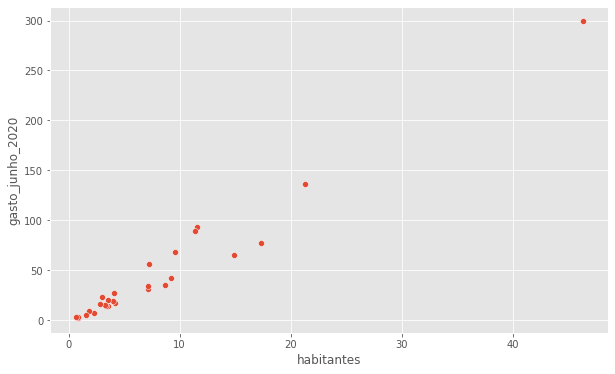

In [125]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')

sns.scatterplot(data=populacao, x=populacao['habitantes']/1000000, y=populacao['gasto_junho_2020']/1000000)

<Figure size 720x432 with 0 Axes>

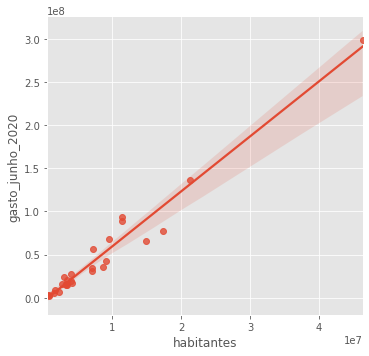

In [126]:
#já traçando a reta de tendência que podemos perceber
plt.figure(figsize=(10,6))
plt.style.use('ggplot')

sns.lmplot(data=populacao, x='habitantes', y='gasto_junho_2020')

In [127]:
populacao['gasto_habitante_jun_2020'] = populacao['gasto_junho_2020'] / populacao['habitantes']
populacao.head()

,habitantes,gasto_julho_2020,gasto_habitante,gasto_junho_2020,gasto_habitante_jun_2020
uf,,,,,
São Paulo,46289333.00,282709570.31,6.11,299060851.62,6.46
Minas Gerais,21292666.00,120467187.34,5.66,135977571.87,6.39
Rio de Janeiro,17366189.00,71540227.33,4.12,77604925.21,4.47
Bahia,14930634.00,58898100.40,3.94,65159300.63,4.36
Paraná,11516840.00,80320852.69,6.97,92901461.36,8.07


In [128]:
populacao.rename(columns={'gasto_habitante':'gasto_habitante_jul_2020'}, inplace=True)

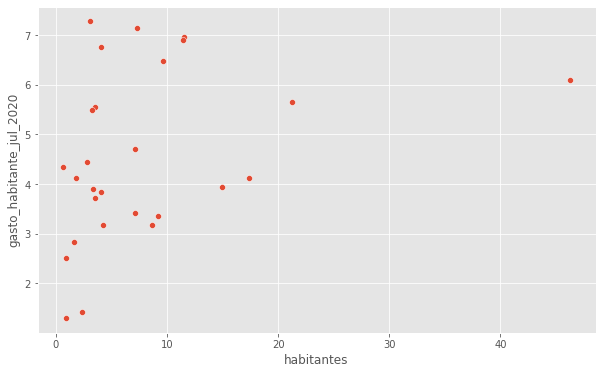

In [129]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')

sns.scatterplot(data=populacao, x=populacao['habitantes']/1000000, y=populacao['gasto_habitante_jul_2020'])

<Figure size 720x432 with 0 Axes>

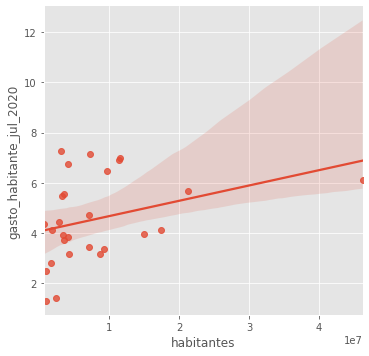

In [130]:
plt.figure(figsize=(10,6))

sns.lmplot(data=populacao, x='habitantes', y='gasto_habitante_jul_2020')

Hipóteses: Os gastos se assemelham nesses meses, seguindo um certo padrão de gastos dos estados, esse gasto parece ser mais relacionado ao tamanho da população, o que implica que, mesmo o gasto por habitante sendo relativamente o mesmo, a grande quantidade populacional faz com que mais verba seja destinada para os estados mais populosos.

Hipótese 2: Os gastos foram relativamente os mesmos, como disse acima, fazendo uma hipótese bem chula e trazendo lembranças de 2020, Junho e Julho foram meses em que a pandemia estava mais relaxada, o que pode dizer então que talvez esse seja o padrão "normal" de gasto dos estados.

Desafio 3: Plotando os dados no mesmo gráfico.

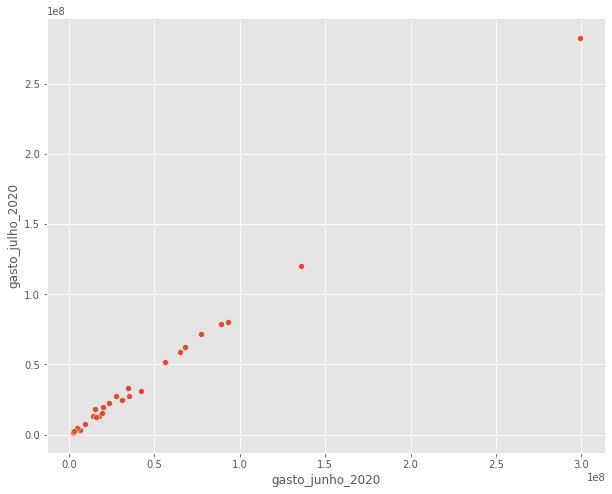

In [131]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=populacao, x='gasto_junho_2020', y='gasto_julho_2020')

<Figure size 1440x576 with 0 Axes>

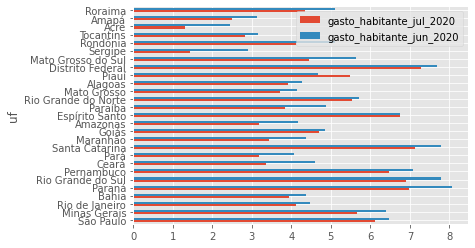

In [132]:
#plotando os gastos por habitante dos meses de Junho e Julho de 2020
plt.figure(figsize=(20,8))

populacao[['gasto_habitante_jul_2020', 'gasto_habitante_jun_2020']].plot(kind='barh')

plt.show()

Com uma olhada rápida nesse gráfico podemos identificar que o gasto por habitante em Julho foi menor do que em Junho, (talvez) confirmando minha hipótese sobre o relaxamento da pandemia e a diminuição nos gastos portanto.

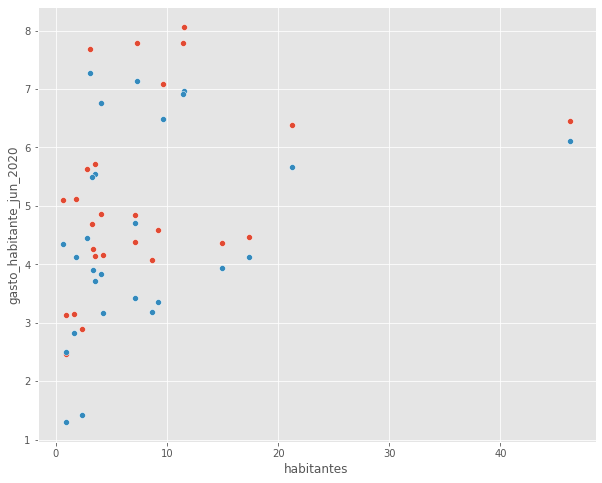

In [133]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=populacao, x=populacao['habitantes']/1000000, y='gasto_habitante_jun_2020')
sns.scatterplot(data=populacao, x=populacao['habitantes']/1000000, y='gasto_habitante_jul_2020')

Uma outra maneira mais eficiente e que permite replicação é criar uma função para fazer a inserção do mês na tabela população.

Indo mais fundo no Seaborn e em sua relação com o Matplotlib.

In [134]:
dados_ordem.index = dados_ordem.index.str[3:]
dados_ordem.index

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

In [135]:
dados_ordem_t = dados_ordem.T

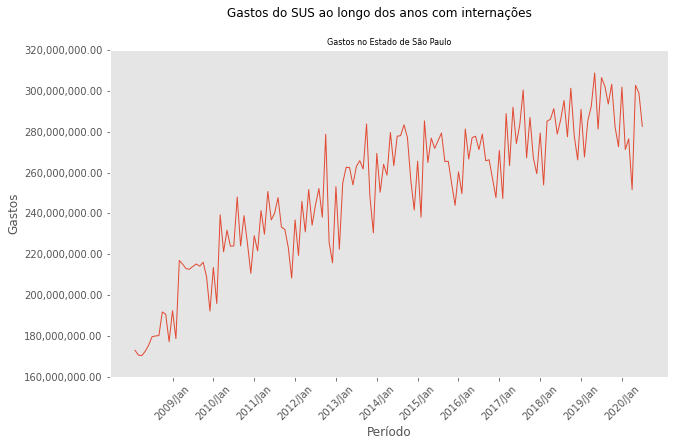

In [136]:
fig = plt.subplots(figsize=(10,6))
plt.style.use('classic')
ax = sns.lineplot(data=dados_ordem_t, x=dados_ordem_t.index, y='São Paulo')
#método que permite o rotacionar o texto do eixo é o "rotation" dentro de xticks e yticks
plt.xticks(rotation=45)
#método para deteminar os locators do eixo é o set_major_locator
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#determinando os títulos
ax.set_xlabel('Período')
ax.set_ylabel('Gastos')
ax.set_title('Gastos no Estado de São Paulo', fontdict={'fontsize':8})

#configurações finais
plt.suptitle('Gastos do SUS ao longo dos anos com internações', fontdict={'fontsize':20})
plt.grid()
plt.show()

In [137]:
from datetime import date  

In [138]:
date.today()

datetime.date(2021, 6, 8)

Definindo uma função para transformar nossas strings de data em date format.

In [139]:
meses = {
    'Jan':1,
    'Fev':2,
    'Mar':3,
    'Abr':4,
    'Mai':5,
    'Jun':6,
    'Jul':7,
    'Ago':8,
    'Set':9,
    'Out':10,
    'Nov':11,
    'Dez':12
}

#def para definar a função dentro dos parenteses são os parâmetros que devem ser passados e depois os processos que eles vão sofrer e o que vão retornar
#o : depois da variável é uma forma de typela
def para_data(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

dados_ordem_t.index.map(para_data)

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

In [140]:
dados_ordem_t.index = dados_ordem_t.index.map(para_data)

Com a função para data já transformamos nossas strings de ano_mes em formato date e o processamento fica mais inteligente para o Pandas e para o Plt que reconhecem e sabem trabalhar com esses padrão.

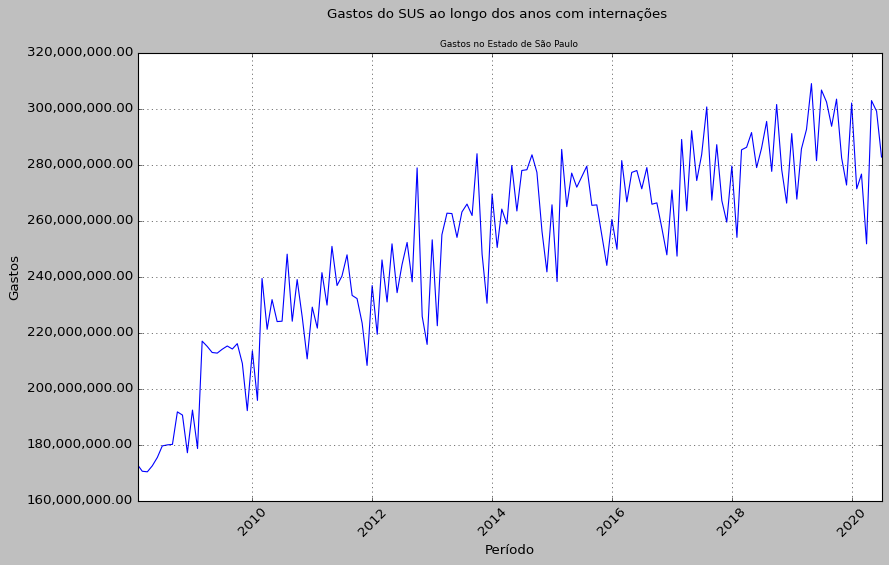

In [141]:
fig = plt.subplots(figsize=(12,7))
plt.style.use('classic')
ax = sns.lineplot(data=dados_ordem_t, x=dados_ordem_t.index, y='São Paulo')
#método que permite o rotacionar o texto do eixo é o "rotation" dentro de xticks e yticks
plt.xticks(rotation=45)
#método para deteminar os locators do eixo é o set_major_locator
#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=11))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

#determinando os títulos
ax.set_xlabel('Período')
ax.set_ylabel('Gastos')
ax.set_title('Gastos no Estado de São Paulo', fontdict={'fontsize':8})

#configurações finais
plt.suptitle('Gastos do SUS ao longo dos anos com internações', fontdict={'fontsize':20})
plt.grid()
plt.show()

Usando o .Melt() para "abrir" o DataFrame e permitir plotar todos os gastos no mesmo gráfico do Seaborn.

O .Melt() deixa num padrão mais conhecido no Excel, onde não se adicionam colunas conforme chegam os dados, mas sim se adicionam linhas!

In [142]:
dados_melted = dados_ordem_t.reset_index().melt(id_vars=['index'], value_vars=dados_ordem_t.columns)
dados_melted.head()

,index,Unidade da Federação,value
0,2008-02-01,São Paulo,172834914.73
1,2008-03-01,São Paulo,170481849.56
2,2008-04-01,São Paulo,170278285.95
3,2008-05-01,São Paulo,172402180.59
4,2008-06-01,São Paulo,175416595.83


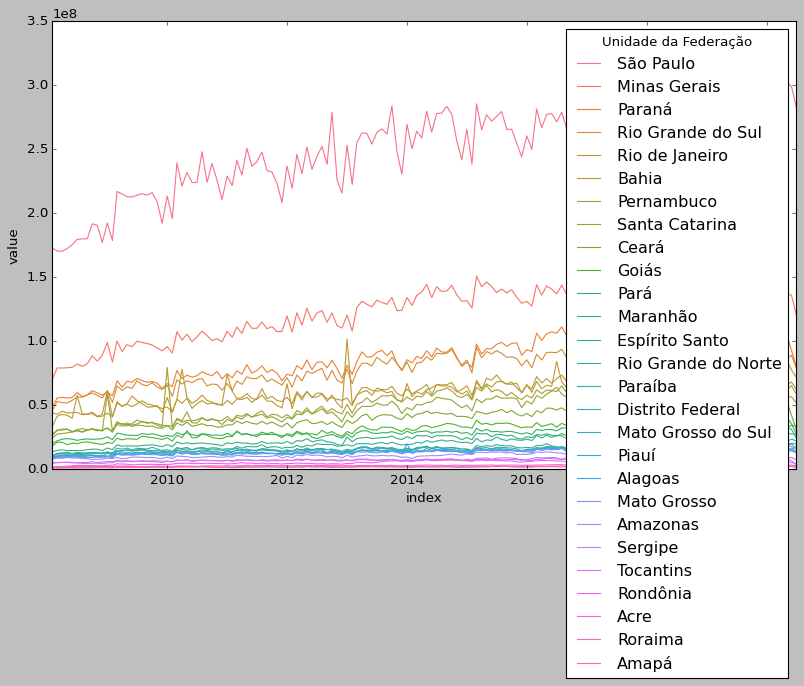

In [143]:
#gráfico porco pra ver se o melted funcionou
fig = plt.subplots(figsize=(12,7))

sns.lineplot(data=dados_melted, x='index', y='value', hue='Unidade da Federação')

In [144]:
dados_ordem_major5

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,15 Pará
2008/Fev,172834914.73,70301089.50,48855046.46,45897704.82,44122593.19,20126081.01
2008/Mar,170481849.56,79119005.51,55611791.07,52928695.92,42892665.52,22149375.82
2008/Abr,170278285.95,79046322.41,56115135.82,51972416.77,45295962.86,23436682.75
2008/Mai,172402180.59,79268070.12,55574831.93,51679350.79,43951349.46,23861080.80
2008/Jun,175416595.83,79608652.53,56094754.74,53759674.01,44102925.77,23502915.90
...,...,...,...,...,...,...
2020/Mar,276606288.92,147078556.29,114476997.52,84651396.59,73594497.93,34749098.46
2020/Abr,251696362.66,126330649.86,96727112.19,76294596.96,68160773.35,28714969.96
2020/Mai,302857660.98,136867275.75,106103737.62,86076113.42,86281033.16,41248502.78
2020/Jun,299060851.62,135977571.87,92901461.36,89019478.82,77604925.21,35396030.78


In [145]:
dados_ordem_major5.index = dados_ordem_major5.index.map(para_data)

In [146]:
#dados_ordem_major5.columns = dados_ordem_major5.columns.str[3:]
dados_ordem_major5_melted = dados_ordem_major5.reset_index().melt(id_vars='index', value_vars=dados_ordem_major5.columns)
dados_ordem_major5_melted.head()

,index,Unidade da Federação,value
0,2008-02-01,35 São Paulo,172834914.73
1,2008-03-01,35 São Paulo,170481849.56
2,2008-04-01,35 São Paulo,170278285.95
3,2008-05-01,35 São Paulo,172402180.59
4,2008-06-01,35 São Paulo,175416595.83


In [147]:
dados_ordem_major5_melted.rename(columns={'index':'data', 'Unidade da Federação':'uf', 'value':'gasto'}, inplace=True)

Fazer um gráfico bonitão do DataFrame dados_ordem_major5_melted

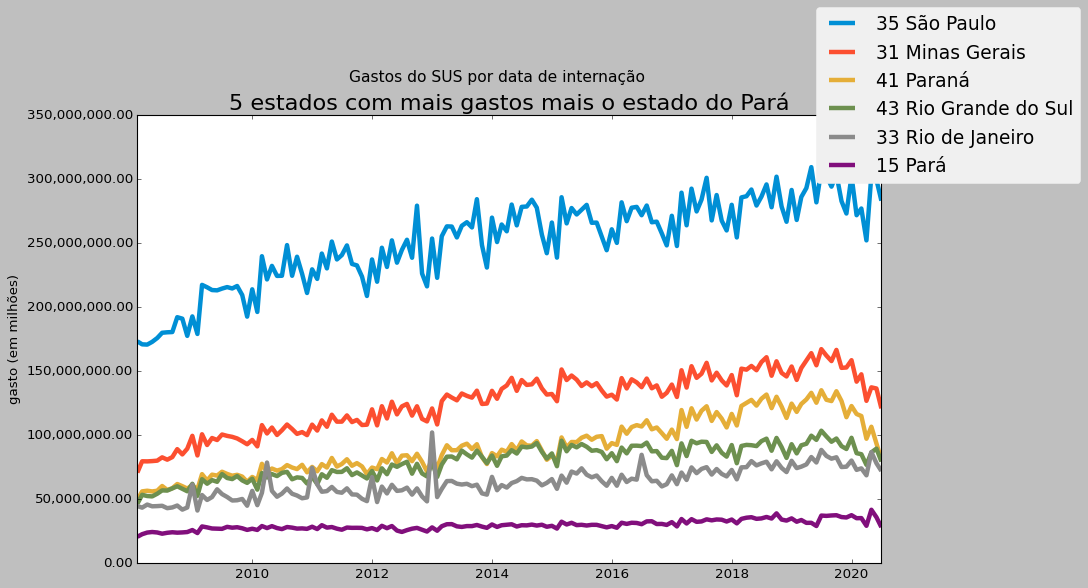

In [148]:
#configurações iniciais
fig = plt.subplots(figsize=(12,7))
plt.style.use('fivethirtyeight')
ax = sns.lineplot(data=dados_ordem_major5_melted, x='data', y='gasto', hue='uf')

#setando os ticks e a legenda
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc='upper right', bbox_to_anchor=(0.64,0.63,0.64,0.63))

#setando os títulos
plt.suptitle('Gastos do SUS por data de internação')
ax.set_title('5 estados com mais gastos mais o estado do Pará')
ax.set_xlabel(None)
ax.set_ylabel('gasto (em milhões)')

plt.show()

Voltando do Melt para o DataFrame original.

In [149]:
dados_melted.rename(columns={'index':'data', 'Unidade da Federação':'uf', 'value':'gasto'}, inplace=True)

In [150]:
dados_melted.pivot(index=['data'], columns=['uf'], values='gasto')

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
data,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1743978.66,8112220.30,1275063.72,7934652.10,33410124.06,27643304.86,10215956.80,10032886.43,18149374.27,13452263.93,7929894.93,8279288.79,70301089.50,48855046.46,10871589.62,20126081.01,26222079.10,9711680.20,9110108.87,45897704.82,44122593.19,1940792.63,771687.83,24409572.92,4636850.76,172834914.73,5051932.07
2008-03-01,2057439.02,9210505.56,1177745.93,8641517.13,41301703.40,30085370.22,11627918.26,12262049.08,20992213.03,14750895.33,9416367.68,9793888.78,79119005.51,55611791.07,12348758.14,22149375.82,30716361.81,10428191.09,10126626.54,52928695.92,42892665.52,1955721.68,876091.18,27483480.50,5017838.07,170481849.56,5200151.87
2008-04-01,2057829.69,10466691.94,1396371.51,8531576.49,42826993.62,31376221.00,11922015.36,12453466.98,21049477.30,15148647.11,9390588.03,8997542.75,79046322.41,56115135.82,12680965.13,23436682.75,30589332.79,10227943.00,10964234.85,51972416.77,45295962.86,2143353.81,896952.53,27806641.44,5265951.03,170278285.95,5343714.73
2008-05-01,2226577.93,9844096.03,1411520.77,9079902.15,42071294.17,31189904.62,11900817.00,11789786.09,19162546.79,14543679.92,9378197.25,9842108.59,79268070.12,55574831.93,13258411.71,23861080.80,31409553.23,10562148.66,11032871.23,51679350.79,43951349.46,2280382.58,1027288.73,28354279.52,5367094.94,172402180.59,5344487.99
2008-06-01,2112576.82,10288668.11,1420892.01,8646295.77,39910042.40,29463965.11,11969271.76,11889687.35,20332533.92,14553978.06,9450300.60,10257782.00,79608652.53,56094754.74,12246686.33,23502915.90,28947510.92,10465088.93,10450599.08,53759674.01,44102925.77,2624542.97,938293.54,28993292.76,4981036.36,175416595.83,5398413.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,2859102.06,15998721.86,2286241.46,14773739.41,70340301.29,46395356.97,19405446.88,26555688.68,34558308.52,28832662.46,14444207.60,17357008.80,147078556.29,114476997.52,17607478.01,34749098.46,59628674.07,15318975.43,20936692.02,84651396.59,73594497.93,7174312.31,2813954.05,56709962.09,9193248.73,276606288.92,7025821.12
2020-04-01,2472063.08,14241361.44,1774558.12,16330913.81,59109689.20,43468816.62,18123899.78,23735724.64,27499307.93,23938156.77,11943713.53,15652772.51,126330649.86,96727112.19,15386630.89,28714969.96,53843729.23,11878587.16,17319947.66,76294596.96,68160773.35,7423678.64,2304961.42,51179993.45,8395906.57,251696362.66,6204453.42
2020-05-01,2383895.48,15254204.31,2701014.87,19441150.53,61756775.71,54200339.48,21437430.22,28614683.75,31870107.62,32979447.97,13981483.29,16703851.10,136867275.75,106103737.62,18970543.57,41248502.78,65424719.40,14175053.45,19916570.52,86076113.42,86281033.16,8581195.13,2910776.44,56843604.33,8450209.57,302857660.98,6732370.56


##Criando novas colunas a partir da manipulação de data com Datetime.

In [151]:
#primeiro precisamos converter a série data para Datetime que está como object
dados_melted['data'] = dados_melted['data'].astype('datetime64')

#agora criamos as colunas para meses e anos
dados_melted['month'] = dados_melted['data'].dt.month
dados_melted['year'] = dados_melted['data'].dt.year
dados_melted.head()

,data,uf,gasto,month,year
0,2008-02-01,São Paulo,172834914.73,2,2008
1,2008-03-01,São Paulo,170481849.56,3,2008
2,2008-04-01,São Paulo,170278285.95,4,2008
3,2008-05-01,São Paulo,172402180.59,5,2008
4,2008-06-01,São Paulo,175416595.83,6,2008


In [152]:
dados_melted['gasto'] = dados_melted['gasto'] / 1000000

Com as transformações podemos agora observar a distribuição dos gastos ao longo dos anos para os estados.

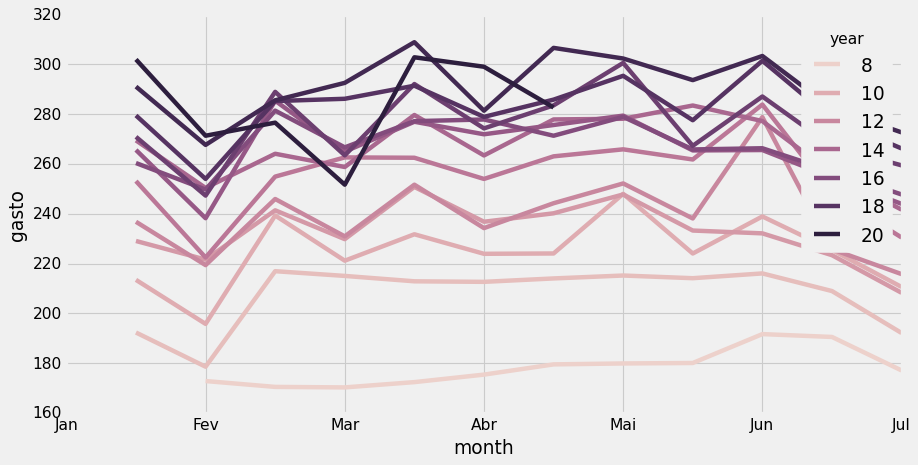

In [153]:
plt.figure(figsize=(12,6))

ax = sns.lineplot(data=dados_melted.query("uf=='São Paulo'"), x='month', y='gasto', hue='year')
ax.set_xticklabels(meses)

plt.show()

##Observando os gastos ao longo dos anos

In [154]:
gastos_anos = dados_melted.groupby('year').sum()

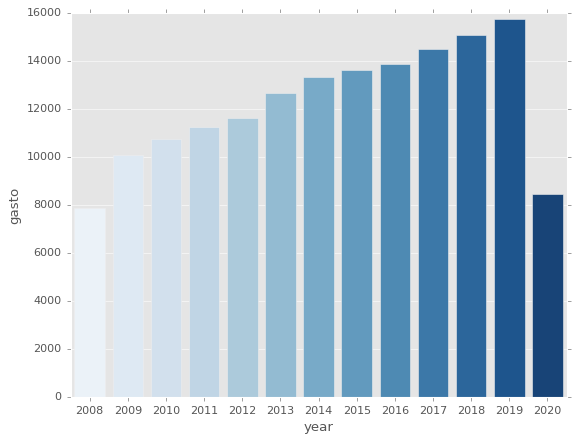

In [216]:
sns.barplot(data=gastos_anos, x=gastos_anos.index, y='gasto', palette='Blues')

Usando gráficos de categorias para observar os gastos em vários estados e aprendendo a gerar vários gráficos no Seaborn

In [156]:
estados_observados = ['São Paulo', 'Minas Gerais', 'Rio Grande do Sul']
gastos_estados_observados = dados_melted.query('uf in @estados_observados').groupby(['uf', 'year']).sum().reset_index()

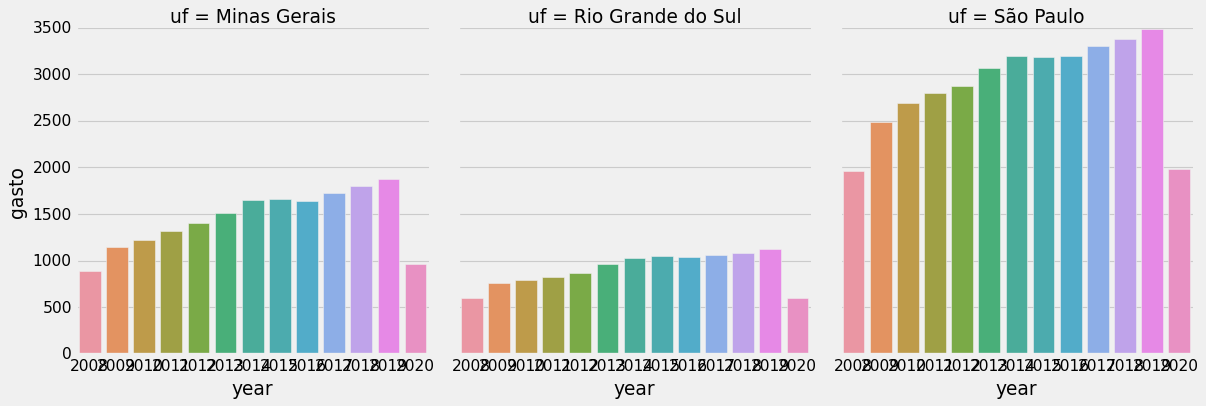

In [157]:
ax = sns.catplot(data=gastos_estados_observados, x='year', y='gasto', col='uf', kind='bar')
plt.style.use('ggplot')


##Desafio aula 05

Vamos comparar os dados de estados de climas diferentes para entedermos (superficialmente) se há alguma relação com os gastos aprovados pelo SUS.

In [173]:
estados_obs_nordeste_sudeste = ['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Rio Grande do Norte',
                               'Pernambuco']

In [174]:
estados_obs_nordeste_sudeste_melted = dados_melted.query("uf == @estados_obs_nordeste_sudeste")
estados_obs_nordeste_sudeste_melted.head()

,data,uf,gasto,month,year
0,2008-02-01,São Paulo,172.83,2,2008
1,2008-03-01,São Paulo,170.48,3,2008
2,2008-04-01,São Paulo,170.28,4,2008
3,2008-05-01,São Paulo,172.40,5,2008
4,2008-06-01,São Paulo,175.42,6,2008


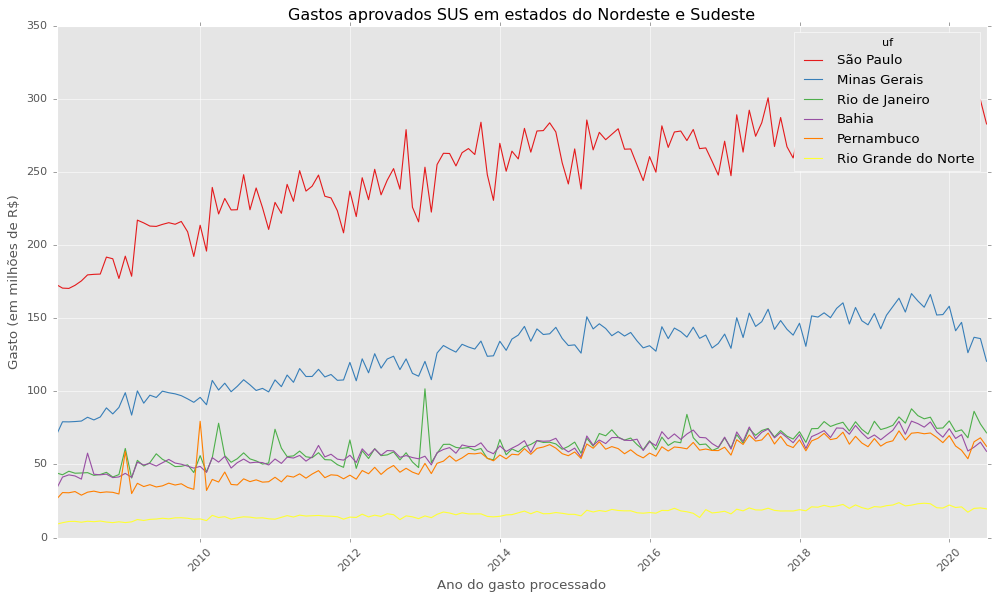

In [214]:
plt.figure(figsize=(15,8))
plt.style.use('ggplot')


ax = sns.lineplot(data=estados_obs_nordeste_sudeste_melted, x='data', y='gasto', hue='uf', palette="Set1")
plt.xticks(rotation=45)

ax.set_xlabel('Ano do gasto processado')
ax.set_ylabel('Gasto (em milhões de R$)')
ax.set_title('Gastos aprovados SUS em estados do Nordeste e Sudeste')
plt.show()

Observações: 

1. O Rio Grande do Norte no extremo norte do país tem um gasto bem padronizado ao longo dos 13 anos observados.

2. Pernambuco tem alguns picos bem altos de gastos pré-2010, mas depois normaliza para o padrão seguidos pelos outros estados.

3. São Paulo e Minas Gerais desde o começo continuam dando respaldo a uma suspeita que eu sempre tive em relação ao dois, são estados muito parecidos, nos gastos, me parece que seguem quase um padrão de x2 (SP tem praticamente o dobro da pop. de MG).

4. Finalmente, o Rio de Janeiro, o estado parece sofrer de vários picos entre fim e começo de ano, o que *pode* ser reflexo das festas de fim de ano nesse estado como o Gui comentou nos vídeos.